# problem statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# IMPORTING ALL THE NECCESSARY LIBRARIES

In [2]:
#Import Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

#Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#!pip install xgboost

# Importing train and test data set

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

# Exploring the data of train set.

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
print('NUMBER OF ROWS AND COLUMNS ARE:',df_train.shape)


NUMBER OF ROWS AND COLUMNS ARE: (8523, 12)


In [7]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# observation
- object class = 7
- numerical class= 5
- later on we will deal with object and numerical class separetely.

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
100*df_train.isnull().sum()/len(df_train)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# observation:
    - from the above two we observe that item_weight and outlet_size contains null value of around 17% and 28% respectively
      in the train data set.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# observation:
    - item_visibility has 0 min value which creates doubt as evrey item has some visibility.

# visualization of above missing value by graph

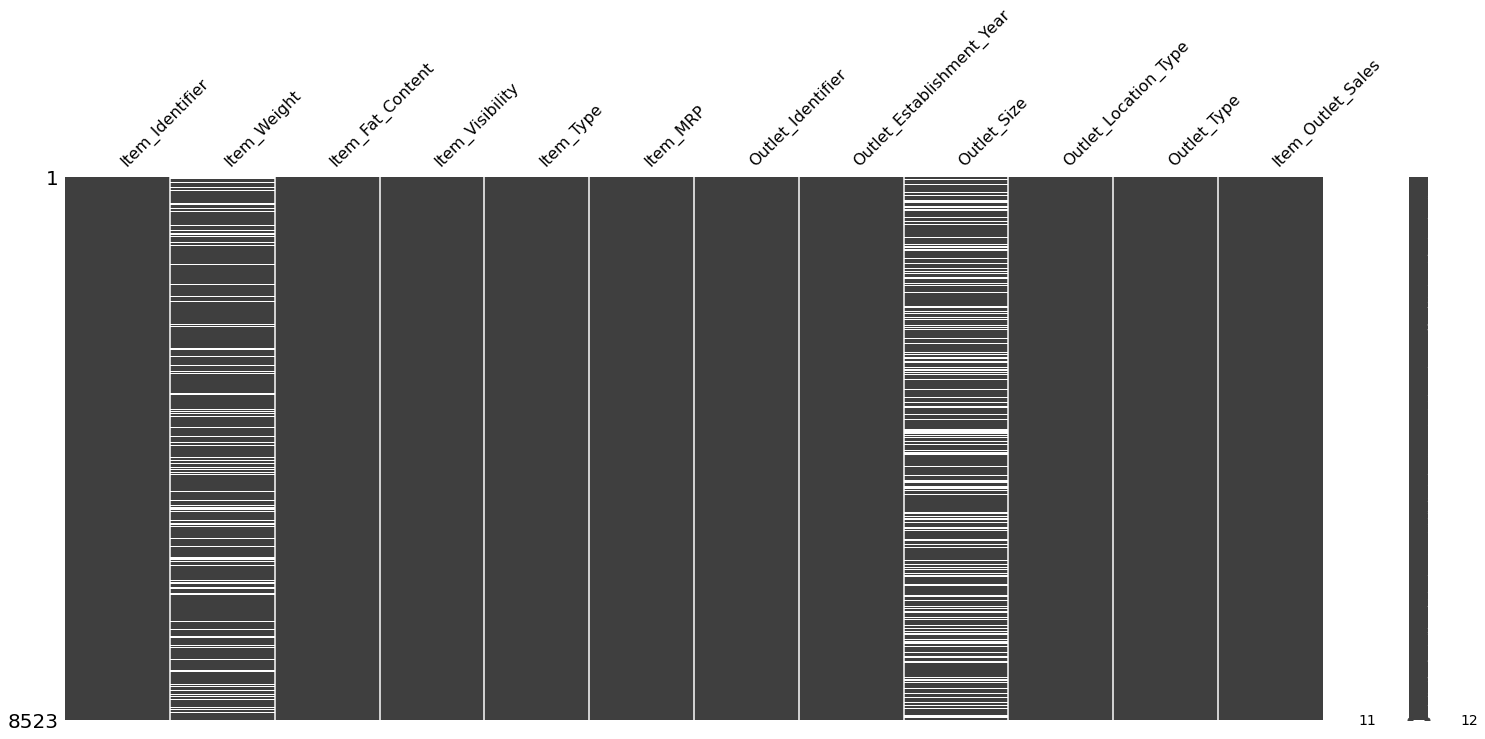

In [12]:
#plotting missing number confirmation
ms.matrix(df_train);

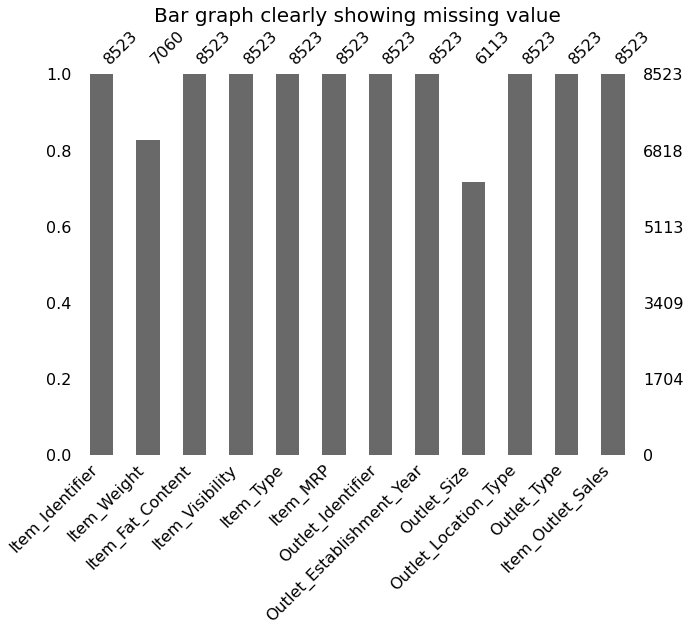

In [13]:
ms.bar(df_train,figsize=(10,7))
plt.title("Bar graph clearly showing missing value",size=20);

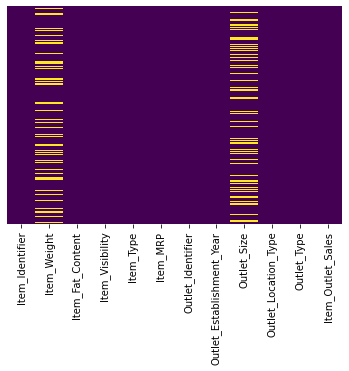

In [14]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# Rectifying all null values and filling missing value of train set properly'

In [15]:
#filling null value of item weight by means number.
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

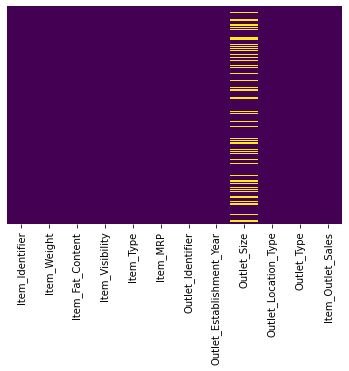

In [16]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# NO NULL VALUE EXISTS IN ITEM_WEIGHT COLUMN

In [17]:
#filling outletsize with the mode as it is categorical data
outlet_size_mode = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_data = df_train['Outlet_Size'].isnull()
df_train.loc[miss_data, 'Outlet_Size'] = df_train.loc[miss_data, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

df_train['Outlet_Size'].isnull().sum()

0

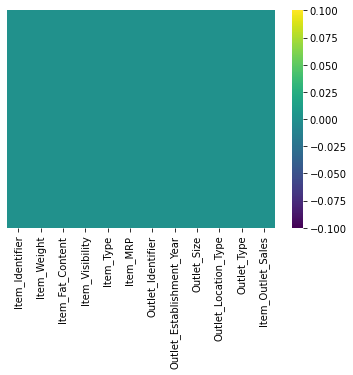

In [19]:
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis');

# no null value exists now

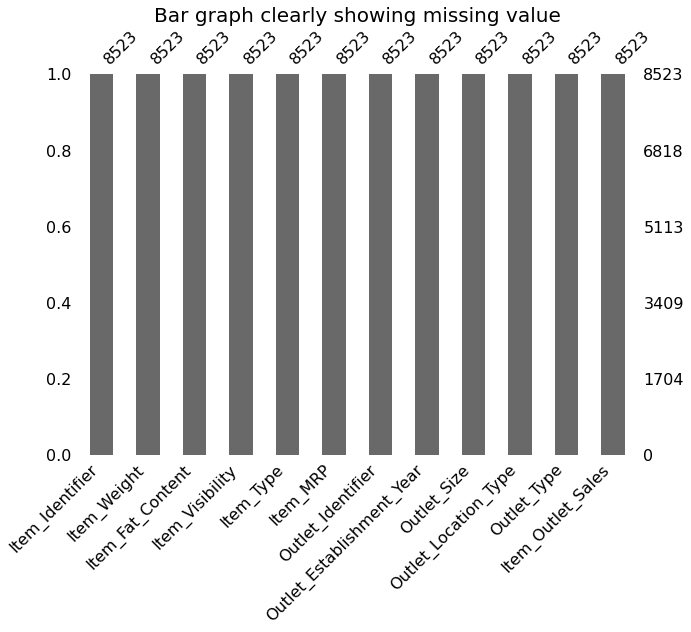

In [20]:
ms.bar(df_train,figsize=(10,7))
plt.title("Bar graph clearly showing missing value",size=20);

# Exploring the data of test set

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [22]:
print('NUMBER OF ROWS AND COLUMNS ARE:',df_test.shape)

NUMBER OF ROWS AND COLUMNS ARE: (5681, 11)


In [23]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


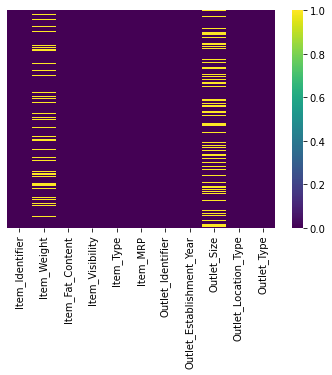

In [24]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis');

In [25]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Observation of test data:-
    1. only 10 colums which is one less than train
    2. target variables are missing
    3. null values exists in both item weight and outlet size

In [26]:
#filling null value of item weight by means number.
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

#filling outletsize with the mode as it is categorical data
outlet_size_mode = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

miss_data = df_test['Outlet_Size'].isnull()
df_test.loc[miss_data, 'Outlet_Size'] = df_test.loc[miss_data, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

df_test['Outlet_Size'].isnull().sum()


0

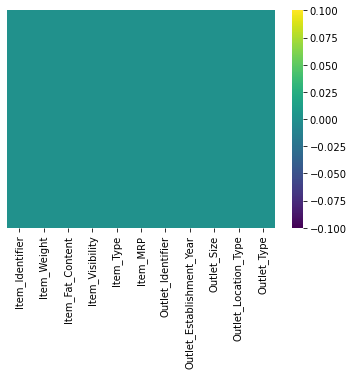

In [27]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis');

# all null values are replaced properly from test data

# TRAIN DATASET
- Let us take numerical features first and see its distribution

# 1.ITEM_VISIBILITY

In [28]:
sum(df_train['Item_Visibility']==0)

526

In [29]:
# replace zeros with mean
df_train.loc[:, 'Item_Visibility'].replace([0], [df_train['Item_Visibility'].mean()], inplace=True)

In [30]:
sum(df_train['Item_Visibility']==0)

0

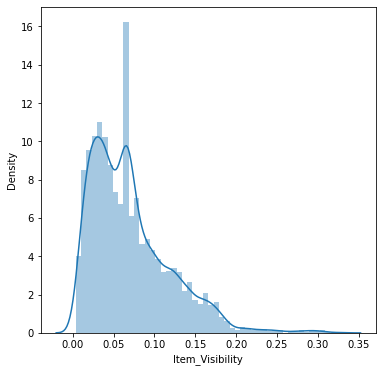

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

# 2. ITEM_WEIGHT

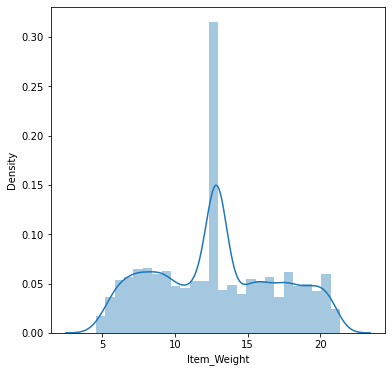

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Weight'])
plt.show()

# 3. OUTLET ESTABLISHMENT YEAR

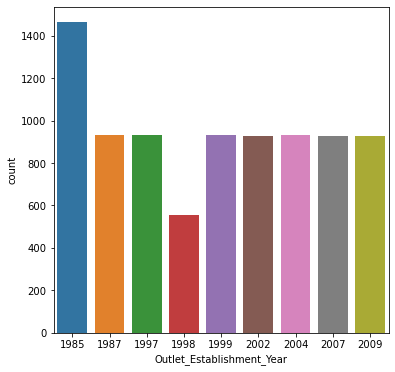

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df_train)
plt.show()

# 4. ITEM OUTLET SALES

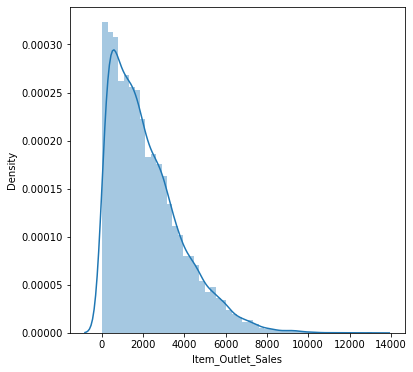

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

# Distribution of categorical features of train datset

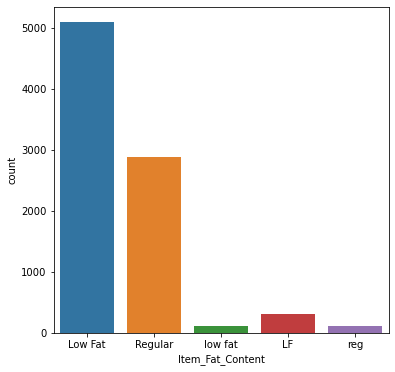

In [35]:
#item fat content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df_train)
plt.show()

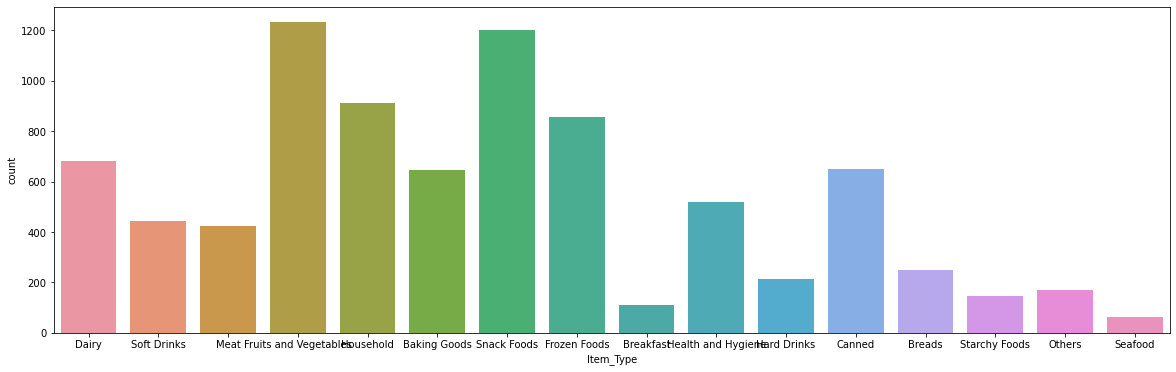

In [36]:
#item_type
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type',data=df_train)
plt.show()

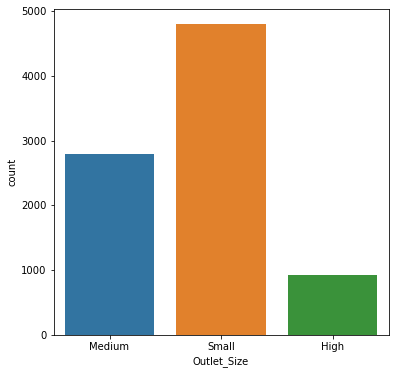

In [37]:
#outlet size
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df_train)
plt.show()

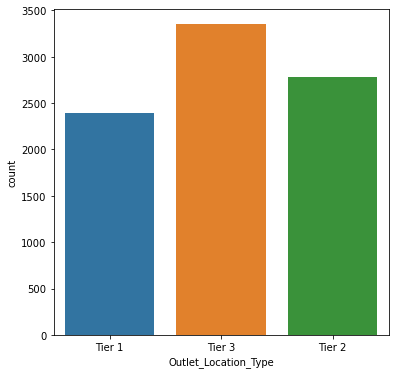

In [38]:
#outlet_location_type
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=df_train)
plt.show()

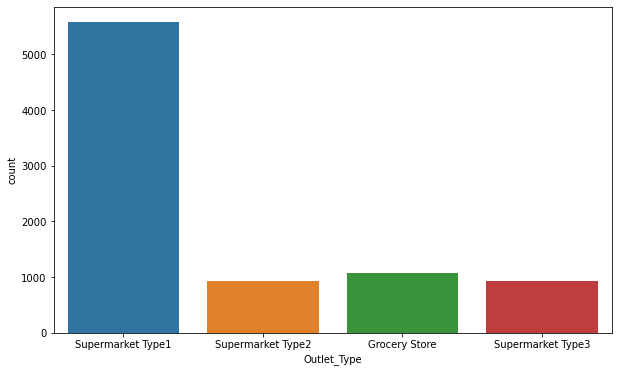

In [39]:
#outlet type
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=df_train)
plt.show()

<AxesSubplot:>

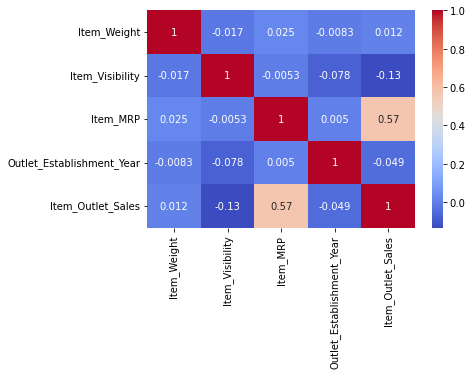

In [40]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# DATA PREPROCESSESING

In [41]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
df_train.replace({'Item_Fat_Content':{'low ft':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df_train['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

In [43]:
df_train['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [44]:
df_train['New_Item_Type'] = df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [45]:
df_train.loc[df_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_train['Item_Fat_Content'].value_counts()

Low Fat       3834
Regular       3006
Non-Edible    1599
low fat         84
Name: Item_Fat_Content, dtype: int64

In [46]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({ 'low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [47]:
# create small values for establishment year
df_train['Outlet_Years'] = 2013 - df_train['Outlet_Establishment_Year']

In [48]:
df_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [49]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])

# Onehot Encoding

In [51]:
df_train = pd.get_dummies(df_train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1


# PREPROCESSING FOR TEST DATA SET

In [52]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
sum(df_test['Item_Visibility']==0)

353

In [54]:
# replace zeros with mean
df_test.loc[:, 'Item_Visibility'].replace([0], [df_test['Item_Visibility'].mean()], inplace=True)

In [55]:
sum(df_train['Item_Visibility']==0)

0

In [56]:
df_test['Item_Fat_Content'].nunique()

5

<AxesSubplot:>

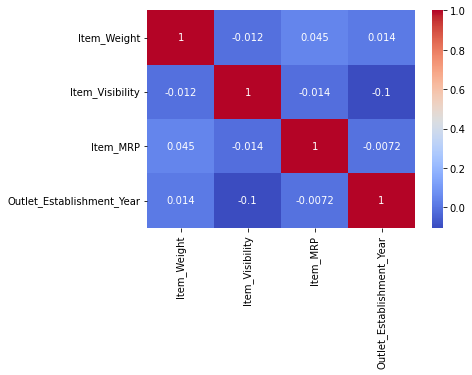

In [57]:
corr = df_test.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [58]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [59]:
df_test.replace({'Item_Fat_Content':{'low ft':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df_test['Item_Fat_Content'].value_counts()

Low Fat    3602
Regular    2013
low fat      66
Name: Item_Fat_Content, dtype: int64

In [60]:
#Creation of New Attributes
df_test['New_Item_Type'] = df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [61]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [62]:
df_test.loc[df_test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test['Item_Fat_Content'].value_counts()

df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({ 'low fat':'Low Fat'})
df_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [63]:
# create small values for establishment year
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']

df_test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

# Label Encoding of test data set

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df_test[col] = le.fit_transform(df_test[col])
    


# Onehot Encoding

In [65]:
df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_test.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,0,1,0,0,0,1,0,1,0


# checking correlation now..

In [66]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
Item_Weight,1.000000e+00,-0.017450,0.028015,0.024756,-0.008301,0.011550,0.008301,-0.007975,-0.016422,0.046858,...,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,1.420504e-14,-0.050492,-0.007953,0.046858
Item_Visibility,-1.745026e-02,1.000000,-0.036000,-0.005259,-0.078355,-0.134138,0.078355,-0.106377,0.007010,-0.070039,...,0.063744,-0.073794,0.012254,0.299436,-0.153434,-0.032753,-5.297190e-02,-0.010900,0.067875,-0.070039
Item_Type,2.801496e-02,-0.036000,1.000000,0.032651,0.004970,0.017048,-0.004970,0.001656,-0.014716,0.189438,...,-0.006536,0.007172,-0.000878,-0.003389,0.001219,-0.000659,2.412673e-03,0.240378,-0.320288,0.189438
Item_MRP,2.475610e-02,-0.005259,0.032651,1.000000,0.005020,0.567574,-0.005020,0.003319,-0.009619,0.004859,...,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-8.300836e-03,-0.078355,0.004970,0.005020,1.000000,-0.049135,-1.000000,0.079035,0.000415,-0.004385,...,-0.201690,0.540820,-0.333895,-0.281196,0.245070,0.466336,-5.380723e-01,0.009441,-0.002312,-0.004385
Item_Outlet_Sales,1.155000e-02,-0.134138,0.017048,0.567574,-0.049135,1.000000,0.049135,0.162325,-0.009438,-0.010861,...,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,3.111920e-01,-0.034672,0.031905,-0.010861
Outlet_Years,8.300836e-03,0.078355,-0.004970,-0.005020,-1.000000,0.049135,1.000000,-0.079035,-0.000415,0.004385,...,0.201690,-0.540820,0.333895,0.281196,-0.245070,-0.466336,5.380723e-01,-0.009441,0.002312,0.004385
Outlet,-7.974756e-03,-0.106377,0.001656,0.003319,0.079035,0.162325,-0.079035,1.000000,0.006896,-0.009738,...,0.611954,0.069080,-0.629001,-0.372802,0.377479,-0.212202,3.436238e-02,0.004384,0.005613,-0.009738
Item_Fat_Content_0,-1.642178e-02,0.007010,-0.014716,-0.009619,0.000415,-0.009438,-0.000415,0.006896,1.000000,-0.443265,...,-0.000921,0.007400,-0.006259,-0.004137,0.003103,-0.001209,8.911961e-04,0.291339,0.195997,-0.443265
Item_Fat_Content_1,4.685780e-02,-0.070039,0.189438,0.004859,-0.004385,-0.010861,0.004385,-0.009738,-0.443265,1.000000,...,-0.002685,-0.005443,0.007695,0.008860,-0.004614,-0.001063,-1.361078e-03,-0.154560,-0.768023,1.000000


# HEAT map for train data

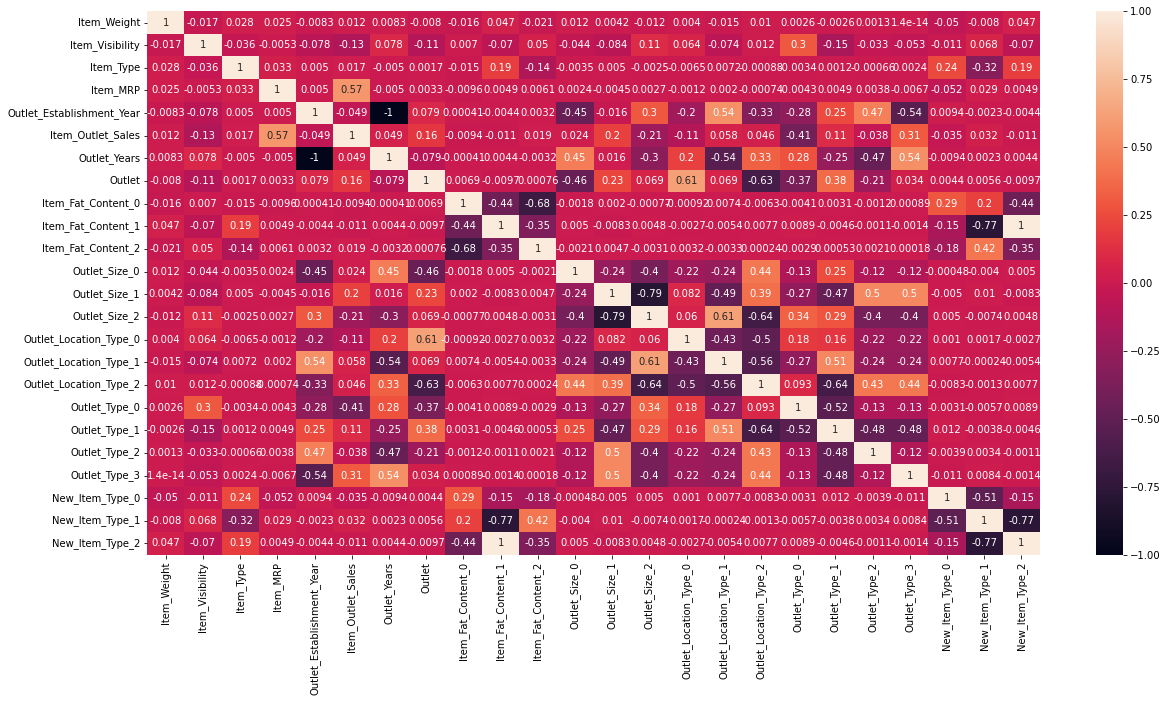

In [67]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

# HEAT MAP FOR TEST DATA

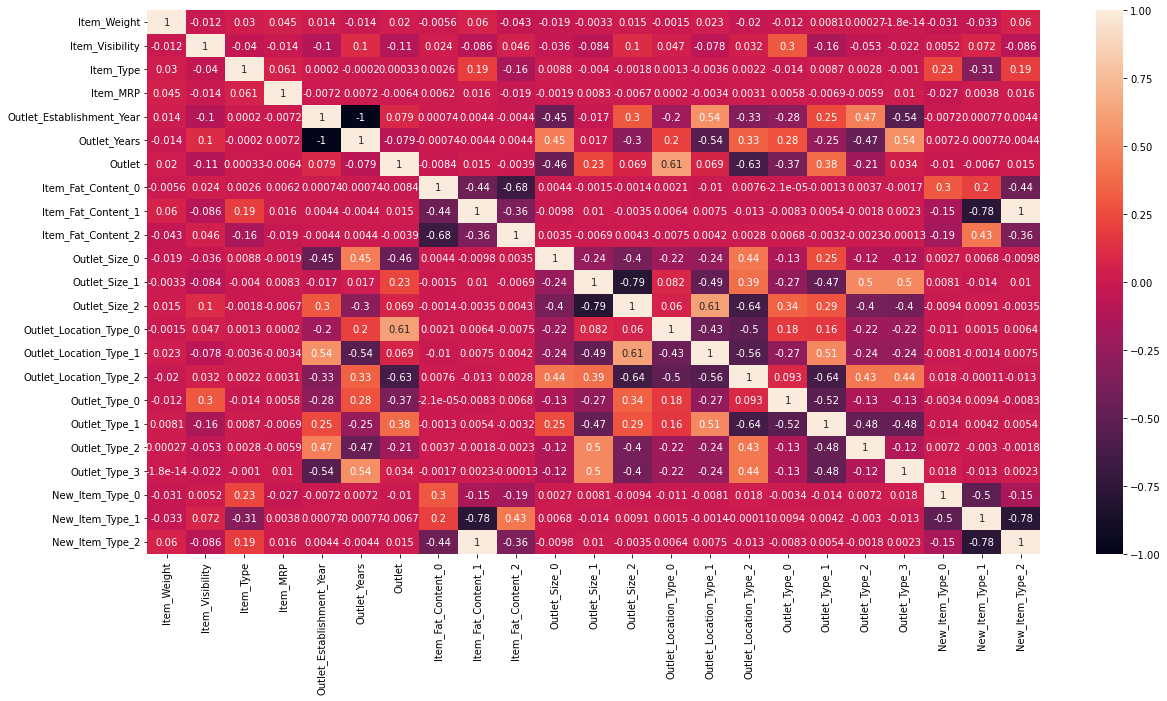

In [68]:
plt.figure(figsize = (20,10))
sns.heatmap(df_test.corr(), annot = True)
plt.show()

# Dropping the unrequired column from train set

In [69]:
df_train = df_train.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])


In [70]:
df_train.shape

(8523, 23)

# USE OF BOX PLOT FOR SEARCHING OUTLIERS

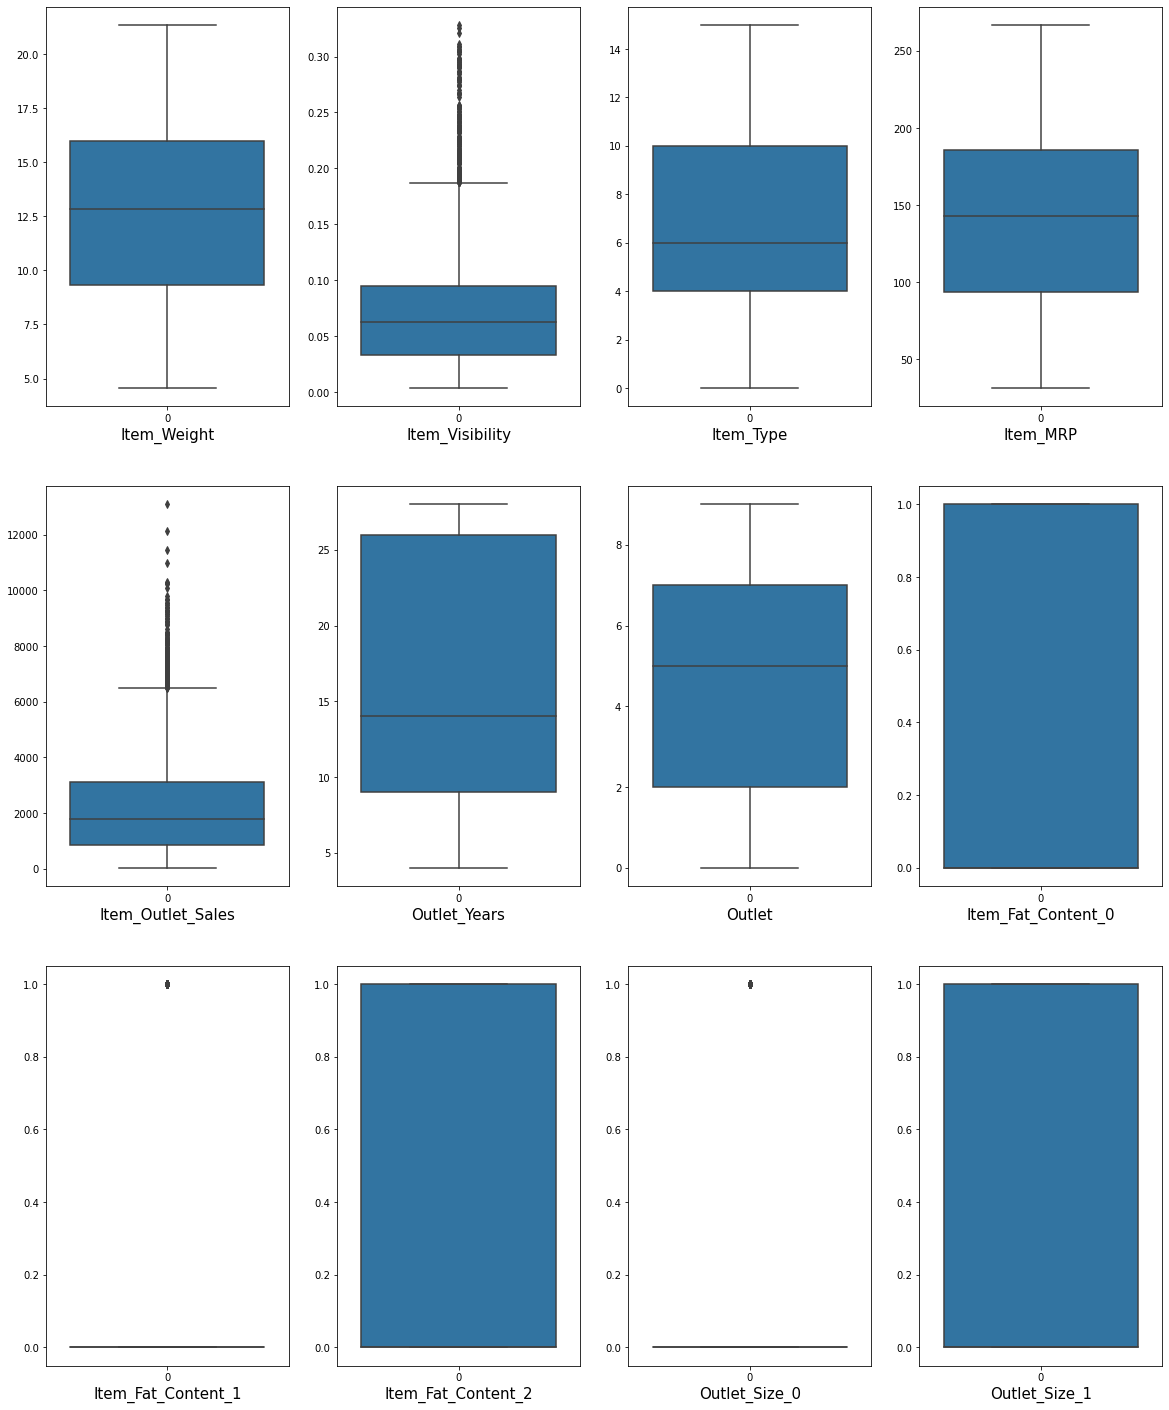

In [71]:
#using boxplot to remove outliers

plt.figure(figsize=(20,25))
graph = 1
for column in df_train:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df_train[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [73]:
q1 = df_train.quantile(.25)
q3 = df_train.quantile(.75)
iqr = q3-q1

In [74]:
iv = (q3.Item_Visibility + (1.5*iqr.Item_Visibility))
print('iv')
index = np.where(df_train['Item_Visibility']>iv)
df_train = df_train.drop(df_train.index[index])

print(df_train.shape)
df_train.reset_index().head()

iv
(8350, 23)


,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,0,9.30,0.016047,4,249.8092,3735.1380,14,9,1,0,...,1,0,0,0,1,0,0,0,1,0
1,1,5.92,0.019278,14,48.2692,443.4228,4,3,0,0,...,0,0,1,0,0,1,0,1,0,0
2,2,17.50,0.016760,10,141.6180,2097.2700,14,9,1,0,...,1,0,0,0,1,0,0,0,1,0
3,3,19.20,0.066132,6,182.0950,732.3800,15,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,4,8.93,0.066132,9,53.8614,994.7052,26,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [75]:
#Checking skewness
df_train.skew()

Item_Weight               0.088114
Item_Visibility           0.788506
Item_Type                 0.099301
Item_MRP                  0.128824
Item_Outlet_Sales         1.170905
Outlet_Years              0.416425
Outlet                   -0.072650
Item_Fat_Content_0        0.162962
Item_Fat_Content_1        1.591159
Item_Fat_Content_2        0.620545
Outlet_Size_0             2.467196
Outlet_Size_1             0.702855
Outlet_Size_2            -0.217846
Outlet_Location_Type_0    1.006139
Outlet_Location_Type_1    0.707996
Outlet_Location_Type_2    0.444687
Outlet_Type_0             2.498235
Outlet_Type_1            -0.710285
Outlet_Type_2             2.476820
Outlet_Type_3             2.461454
New_Item_Type_0           2.785124
New_Item_Type_1          -0.965640
New_Item_Type_2           1.591159
dtype: float64

# scaling the train data

In [76]:
#Spliting data into x and y variable.
x = df_train.drop(columns = ['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [77]:
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,4,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,26,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [78]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [79]:
x.shape

(8350, 22)

In [80]:
y.shape

(8350,)

In [81]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [82]:
#Scaling x data
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [83]:
x_scaled.shape

(8350, 22)

In [84]:
y.shape

(8350,)

# checking VIF FOR CORRELATION

In [85]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.006522,Item_Weight
1,1.030460,Item_Visibility
2,1.127860,Item_Type
3,1.005913,Item_MRP
4,1054.292322,Outlet_Years
5,109.243178,Outlet
6,inf,Item_Fat_Content_0
7,inf,Item_Fat_Content_1
8,inf,Item_Fat_Content_2
9,inf,Outlet_Size_0


In [87]:
#Import train test split
from sklearn.model_selection import train_test_split

In [88]:
#Spliting dataset into train and test.
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 5)

# MODEL BUILDINGS USING VARIOUS METHODS

In [89]:
#Defining function to fit and check model metrics
def reg(model,x_train,y_train):
    
    #Train models
    model.fit(x_train,y_train)
    
    #Predict x_test
    pred = model.predict(x_test)

    #Calculating MAE score.
    MAE = mean_absolute_error(y_test, pred)
    print('MAE Score is: ', MAE)
    
    #Calculating MSE score.
    MSE = mean_squared_error(y_test, pred)
    print('MSE Score is: ', MSE)
    
    #Calculating RMSE score. lower the RMSE is better
    RMSE = mean_squared_error(y_test, pred, squared = False)
    print('RMSE Score is: ', RMSE)
    
    #Calculate R2 score
    R2 = r2_score(y_test, pred, multioutput = 'variance_weighted') * 100
    print('R2 score is: ', R2)
    
    #Calculate cross validation score
    cv = (cross_val_score(model, x, y, cv = 5).mean())*100
    print('Cross Validation Score is: ', cv)
    
    #Calculate the difference between R2 and Cross validation. Lowe is better
    var = R2 - cv
    print('R2 - Cross Validation score is: ', var) 

In [90]:
#Linear Regression Model
model = LinearRegression(fit_intercept = True, normalize = 'deprecated')
reg(model, x_train, y_train)

MAE Score is:  836.929617041347
MSE Score is:  1226499.8912703444
RMSE Score is:  1107.474555585971
R2 score is:  54.842431914513476
Cross Validation Score is:  55.53580114986152
R2 - Cross Validation score is:  -0.6933692353480438


In [91]:
# Decision Tree Regressor
model = DecisionTreeRegressor(criterion = "squared_error", splitter = 'best', min_samples_split = 2,min_samples_leaf = 4, random_state = 5)
reg(model, x_train, y_train)

MAE Score is:  965.3411807325351
MSE Score is:  1839242.2084432214
RMSE Score is:  1356.1866421858097
R2 score is:  32.28233785862743
Cross Validation Score is:  36.06487186459166
R2 - Cross Validation score is:  -3.78253400596423


In [92]:
# K Neighbors Regressor
model = KNeighborsRegressor(n_neighbors = 17, weights = 'uniform', algorithm = 'auto', leaf_size=10, p = 2, metric = 'minkowski')
reg(model, x_train, y_train)

MAE Score is:  820.69685735118
MSE Score is:  1248226.9405316024
RMSE Score is:  1117.2407710657549
R2 score is:  54.0424801874116
Cross Validation Score is:  43.034117696419486
R2 - Cross Validation score is:  11.008362490992113


In [93]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 1.0)
reg(model, x_train, y_train)

MAE Score is:  797.7542322131737
MSE Score is:  1268090.1873307289
RMSE Score is:  1126.0951058106632
R2 score is:  53.31115038778045
Cross Validation Score is:  53.40429178284063
R2 - Cross Validation score is:  -0.09314139506017938


In [94]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 2)
reg(model, x_train, y_train)

MAE Score is:  769.5065258006396
MSE Score is:  1128559.782948191
RMSE Score is:  1062.3369441698765
R2 score is:  58.44841438653532
Cross Validation Score is:  58.69216294378282
R2 - Cross Validation score is:  -0.24374855724749978


In [95]:
# Ada Boost Regressor
model = AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate = 1.0, loss='linear', random_state = 5,)
reg(model, x_train, y_train)

MAE Score is:  942.92540196827
MSE Score is:  1472026.259228193
RMSE Score is:  1213.2708927639337
R2 score is:  45.80258302683438
Cross Validation Score is:  46.691111583389336
R2 - Cross Validation score is:  -0.8885285565549594


In [96]:
# Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 1.0)
reg(model, x_train, y_train)

MAE Score is:  822.1489448718562
MSE Score is:  1343838.9121328336
RMSE Score is:  1159.2406618700163
R2 score is:  50.522215613316725
Cross Validation Score is:  50.46138965312223
R2 - Cross Validation score is:  0.06082596019449227


In [97]:
# XGBoost Regressor
model = XGBRegressor()
reg(model, x_train, y_train)

MAE Score is:  820.8856067647691
MSE Score is:  1354428.3980320229
RMSE Score is:  1163.7991227149223
R2 score is:  50.13232937371206
Cross Validation Score is:  51.08724642946022
R2 - Cross Validation score is:  -0.9549170557481617


MAE Score is:  769.5065258006396
MSE Score is:  1128559.782948191
RMSE Score is:  1062.3369441698765
R2 score is:  58.44841438653532
Cross Validation Score is:  58.69829455365482
R2 - Cross Validation score is:  -0.24988016711949967


<AxesSubplot:title={'center':'Feature Importances'}>

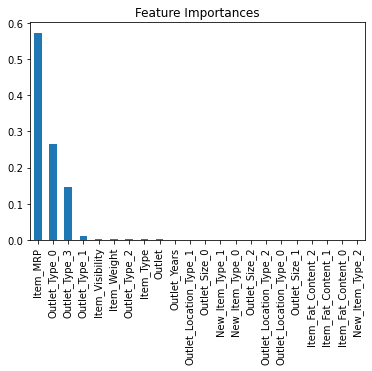

In [98]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 2)
reg(model, x_train, y_train)

coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importances')

# Hyper Parameter Tuning

In [99]:
#Hyperparameters for GradientBoostingRegressor
params = {'learning_rate': [0.15, 0.1, 0.10, 0.05], 
          'n_estimators': [100,150,200]}

#Create an instance of gradient boosting regressor
grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = params, scoring = 'r2')
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

({'learning_rate': 0.05, 'n_estimators': 100}, 0.5903803037292983)

In [100]:
models = grid.best_estimator_
models.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05)

In [101]:
reg(models, x_train, y_train)

MAE Score is:  769.6581835340847
MSE Score is:  1129977.356990583
RMSE Score is:  1063.0039308443704
R2 score is:  58.39622180438252
Cross Validation Score is:  58.73374375874363
R2 - Cross Validation score is:  -0.3375219543611081


# little improvement in the score after hypertuning.

# SAVING THE BEST MODEL

In [102]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'best_model.pickle'
pickle.dump(models, open('Grad_model', 'wb'))

In [103]:
#Prediction using the saved model
loaded_model = pickle.load(open('Grad_model','rb'))

In [104]:
#Loading model
final_result = loaded_model.predict(x_test)
final_result

array([1957.71259521,  947.35350261, 3283.71646476, ..., 5933.20287963,
       3996.9834274 , 3603.2280734 ])

In [106]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': final_result})
conclusion.head()

,Actual Sales,Predicted Sales
7092,1454.1072,1957.712595
71,599.2200,947.353503
5113,3004.0896,3283.716465
6232,2572.6512,1783.794181
21,4064.0432,3698.211652
